In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns
import shutil
import keras
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16

In [2]:
from glob import glob
import cv2
from PIL import Image, ImageStat
import math
from glob import glob
import cv2
trn1='D:/Inv_Data_Imbalance/data/invasive-aquatic-species-data/invasive/*/'
trn2='D:/Inv_Data_Imbalance/data/invasive-aquatic-species-data/noninvasive/*/'
tr1= glob(trn1)
tr2= glob(trn2)

In [29]:
len(tr2)

457

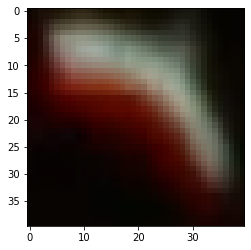

In [3]:
imgs= glob(tr2[13]+'/*')
#imgs
c = cv2.imread(imgs[7])
c = cv2.resize(c, dsize=[40,40])
c = c.reshape(40,40,3)
plt.imshow(c)

In [3]:
tran_index_inv = np.round( len(tr1)* .90  )
tran_index_noninv = np.round( len(tr2)* .90  )
tran_index_noninv

3330.0

In [4]:
data = []
label = []
for i in tr1[:(int) (tran_index_inv)]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(1)


for i in tr2[:(int)(tran_index_noninv)]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(0)

imgdata=[]
for i in range(len(data)):
    a = Image.open(data[i])
    b = a.resize((48, 48))
    c = np.array(b)
    imgdata.append(c.reshape(48,48,3))
    

In [5]:
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
X_train = idata
X_train = X_train.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train),48,48,3))
# One hot vector representation of labels
Y_train = to_categorical(label)

X_train,Y_train = shuffle(X_train,Y_train)

In [7]:
data = []
label = []
for i in tr1[(int) (tran_index_inv) + 1 :]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(1)


for i in tr2[ (int)(tran_index_noninv) + 1:]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(0)

imgdata=[]
for i in range(len(data)):
    a = Image.open(data[i])
    b = a.resize((48, 48))
    c = np.array(b)
    imgdata.append(c.reshape(48,48,3))
    

In [29]:
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
X_test = idata
X_test = X_test.astype('float32') / 255.
X_test = np.reshape(X_test, (len(X_test),48,48,3))
# One hot vector representation of labels
Y_test = to_categorical(label)

X_test,Y_test = shuffle(X_test , Y_test)

In [6]:
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val

In [19]:
import numpy as np
import pandas as pd


from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [30]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape=(48, 48, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(16, (3, 3),))
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))
#model.summary()

In [31]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=('accuracy'))

model.fit(X_train, Y_train, epochs=12, batch_size=32, validation_split = .2, verbose = 1)

Epoch 1/12
2580/2580 [==============================] - 257s 99ms/step - loss: 0.1818 - accuracy: 0.9230 - val_loss: 0.1533 - val_accuracy: 0.9350
Epoch 2/12
2580/2580 [==============================] - 523s 203ms/step - loss: 0.1531 - accuracy: 0.9364 - val_loss: 0.1516 - val_accuracy: 0.9396
Epoch 3/12
2580/2580 [==============================] - 520s 202ms/step - loss: 0.1443 - accuracy: 0.9409 - val_loss: 0.1378 - val_accuracy: 0.9431
Epoch 4/12
2580/2580 [==============================] - 450s 174ms/step - loss: 0.1386 - accuracy: 0.9422 - val_loss: 0.1375 - val_accuracy: 0.9436
Epoch 5/12
2580/2580 [==============================] - 409s 159ms/step - loss: 0.1347 - accuracy: 0.9442 - val_loss: 0.1407 - val_accuracy: 0.9437
Epoch 6/12
2580/2580 [==============================] - 401s 155ms/step - loss: 0.1307 - accuracy: 0.9465 - val_loss: 0.1355 - val_accuracy: 0.9460
Epoch 7/12
2580/2580 [==============================] - 456s 177ms/step - loss: 0.1289 - accuracy: 0.9475 - val_l

In [14]:
#X_test = encoded2
pred = model.predict(X_test)
p = np.round(pred)
f1 = get_f1(Y_test, p)
f1

y_p = []
for i in range(len(p)):
    if ( p[i][0] == 0 ):
        y_p.append(1)
    else :
        y_p.append(0)
y_p = np.array(y_p)
y_t = []
for i in range(len(Y_test)):
    if ( Y_test[i][0] == 0 ):
        y_t.append(1)
    else :
        y_t.append(0)
y_t = np.array(y_t)

from sklearn.metrics import confusion_matrix
a=(confusion_matrix(y_t, y_p , labels=[0,1]))
a.T

array([[7568,  383],
       [ 339, 1257]], dtype=int64)

In [32]:
from keras.models import load_model

model.save('models/base_model2.h5') 

In [5]:
data = []
label = []
breath = []
total = 0

for j in tr1[:(int) (tran_index_inv)]:
    label.append(1)
    a = glob(j+'/*')
    breath.append(len(a))
    total = total + len(a)
    
for j in tr2[:(int) (tran_index_noninv)]:
    label.append(0)
    a = glob(j+'/*')
    breath.append(len(a)) 
    total = total + len(a)

for j in range(0,len(tr1[:(int) (tran_index_inv)])):
    a = glob(tr1[j]+'/*')
    for k in range(0,6):
        data.append(a[k])

for j in range(0,len(tr2[:(int) (tran_index_noninv)])):
    a = glob(tr2[j]+'/*')
    for k in range(0,6):
        data.append(a[k])        
        

imgdata=[]
for i in range(len(data)):
    a = cv2.imread(data[i])
    a = cv2.cvtColor( a , cv2.COLOR_BGR2LAB)
    c = resized = cv2.resize(a, (15,15), interpolation = cv2.INTER_AREA)
    b = np.array(c)
    imgdata.append(b.reshape(15,15,3))
  
    
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
X_train = idata
X_train = X_train.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train),15,15,3))


In [6]:
end= 0
train_df= []
breath = 6

i = 0
for i in range(0, len(label)):
    deff = []
    for k in range(0, (breath)):
        
        index = (i*6+k)
        
        deff.append(X_train[index])
        
    train_df.append(deff)

Y_train = to_categorical(label)
train_df = np.array(train_df)
train_df,Y_train = shuffle(train_df,Y_train)
np.shape(train_df)

(3600, 6, 15, 15, 3)

In [7]:
data = []
label = []
breath = []
total = 0

for j in tr1[(int) (tran_index_inv) + 1 :]:
    label.append(1)
    a = glob(j+'/*')
    breath.append(len(a))
    total = total + len(a)
    
for j in tr2[ (int)(tran_index_noninv) + 1:]:
    label.append(0)
    a = glob(j+'/*')
    breath.append(len(a)) 
    total = total + len(a)

for j in range(0,len(tr1[(int) (tran_index_inv) + 1 :])):
    a = glob(tr1[j]+'/*')
    for k in range(0,6):
        data.append(a[k])

for j in range(0,len(tr2[ (int)(tran_index_noninv) + 1:])):
    a = glob(tr2[j]+'/*')
    for k in range(0,6):
        data.append(a[k])        
        

imgdata=[]
for i in range(len(data)):
    a = cv2.imread(data[i])
    a = cv2.cvtColor( a , cv2.COLOR_BGR2LAB)
    c = resized = cv2.resize(a, (15,15), interpolation = cv2.INTER_AREA)
    b = np.array(c)
    imgdata.append(b.reshape(15,15,3))
    
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
X_test = idata
X_test = X_test.astype('float32') / 255.
X_test = np.reshape(X_test, (len(X_test),15,15,3))



In [8]:
end= 0
test_df= []
breath = 6

i = 0
for i in range(0, len(label)):
    deff = []
    for k in range(0, (breath)):
        
        index = (i*6+k)
        
        deff.append(X_test[index])
        
    test_df.append(deff)
    
Y_test = to_categorical(label)
test_df = np.array(test_df)
test_df,Y_test = shuffle(test_df,Y_test)
np.shape(test_df)

(772, 6, 15, 15, 3)

In [10]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models

model= models.Sequential()
model.add(TimeDistributed(Conv2D(16, (3, 3), strides=(1,1),activation='relu'),input_shape=(6, 15, 15, 3)))
model.add(TimeDistributed(MaxPooling2D(2,2)))
model.add(TimeDistributed(Conv2D(8, (3, 3), strides=(1,1),activation='relu')))
model.add(TimeDistributed(MaxPooling2D(2,2)))


model.add(TimeDistributed(Flatten()))

model.add(LSTM(6,return_sequences=False,dropout=0.2)) # used 32 units

model.add(Dense(8,activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_6 (TimeDis  (None, 6, 13, 13, 16)    448       
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 6, 6, 6, 16)      0         
 tributed)                                                       
                                                                 
 time_distributed_8 (TimeDis  (None, 6, 4, 4, 8)       1160      
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, 6, 2, 2, 8)       0         
 tributed)                                                       
                                                                 
 time_distributed_10 (TimeDi  (None, 6, 32)           

In [11]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
model.fit(train_df,Y_train,validation_split=0.2,batch_size=32,epochs=400)

Epoch 1/400
90/90 [==============================] - 4s 21ms/step - loss: 0.5437 - accuracy: 0.7781 - val_loss: 0.4400 - val_accuracy: 0.8389
Epoch 2/400
90/90 [==============================] - 1s 13ms/step - loss: 0.4735 - accuracy: 0.8181 - val_loss: 0.4417 - val_accuracy: 0.8389
Epoch 3/400
90/90 [==============================] - 1s 13ms/step - loss: 0.4728 - accuracy: 0.8181 - val_loss: 0.4373 - val_accuracy: 0.8389
Epoch 4/400
90/90 [==============================] - 1s 13ms/step - loss: 0.4679 - accuracy: 0.8181 - val_loss: 0.4296 - val_accuracy: 0.8389
Epoch 5/400
90/90 [==============================] - 1s 13ms/step - loss: 0.4550 - accuracy: 0.8181 - val_loss: 0.4015 - val_accuracy: 0.8389
Epoch 6/400
90/90 [==============================] - 1s 13ms/step - loss: 0.3991 - accuracy: 0.8181 - val_loss: 0.3117 - val_accuracy: 0.8389
Epoch 7/400
90/90 [==============================] - 1s 13ms/step - loss: 0.3215 - accuracy: 0.8417 - val_loss: 0.2345 - val_accuracy: 0.9000
Epoch 

90/90 [==============================] - 1s 16ms/step - loss: 0.1409 - accuracy: 0.9431 - val_loss: 0.1150 - val_accuracy: 0.9528
Epoch 116/400
90/90 [==============================] - 2s 18ms/step - loss: 0.1418 - accuracy: 0.9438 - val_loss: 0.1157 - val_accuracy: 0.9500
Epoch 117/400
90/90 [==============================] - 1s 14ms/step - loss: 0.1464 - accuracy: 0.9385 - val_loss: 0.1138 - val_accuracy: 0.9542
Epoch 118/400
90/90 [==============================] - 1s 14ms/step - loss: 0.1381 - accuracy: 0.9403 - val_loss: 0.1326 - val_accuracy: 0.9403
Epoch 119/400
90/90 [==============================] - 1s 14ms/step - loss: 0.1449 - accuracy: 0.9378 - val_loss: 0.1318 - val_accuracy: 0.9528
Epoch 120/400
90/90 [==============================] - 1s 14ms/step - loss: 0.1474 - accuracy: 0.9378 - val_loss: 0.1130 - val_accuracy: 0.9486
Epoch 121/400
90/90 [==============================] - 1s 14ms/step - loss: 0.1429 - accuracy: 0.9399 - val_loss: 0.1191 - val_accuracy: 0.9514
Epoch 

Epoch 172/400
90/90 [==============================] - 1s 14ms/step - loss: 0.1365 - accuracy: 0.9462 - val_loss: 0.1138 - val_accuracy: 0.9556
Epoch 173/400
90/90 [==============================] - 1s 13ms/step - loss: 0.1325 - accuracy: 0.9490 - val_loss: 0.1093 - val_accuracy: 0.9472
Epoch 174/400
90/90 [==============================] - 1s 13ms/step - loss: 0.1309 - accuracy: 0.9451 - val_loss: 0.1222 - val_accuracy: 0.9444
Epoch 175/400
90/90 [==============================] - 1s 13ms/step - loss: 0.1229 - accuracy: 0.9528 - val_loss: 0.1062 - val_accuracy: 0.9472
Epoch 176/400
90/90 [==============================] - 1s 13ms/step - loss: 0.1285 - accuracy: 0.9476 - val_loss: 0.1087 - val_accuracy: 0.9542
Epoch 177/400
90/90 [==============================] - 1s 13ms/step - loss: 0.1226 - accuracy: 0.9486 - val_loss: 0.1102 - val_accuracy: 0.9417
Epoch 178/400
90/90 [==============================] - 1s 13ms/step - loss: 0.1245 - accuracy: 0.9497 - val_loss: 0.1224 - val_accuracy:

Epoch 229/400
90/90 [==============================] - 1s 15ms/step - loss: 0.1185 - accuracy: 0.9535 - val_loss: 0.1198 - val_accuracy: 0.9500
Epoch 230/400
90/90 [==============================] - 1s 14ms/step - loss: 0.1198 - accuracy: 0.9517 - val_loss: 0.1261 - val_accuracy: 0.9431
Epoch 231/400
90/90 [==============================] - 1s 14ms/step - loss: 0.1161 - accuracy: 0.9542 - val_loss: 0.1181 - val_accuracy: 0.9500
Epoch 232/400
90/90 [==============================] - 1s 16ms/step - loss: 0.1180 - accuracy: 0.9497 - val_loss: 0.1131 - val_accuracy: 0.9514
Epoch 233/400
90/90 [==============================] - 1s 14ms/step - loss: 0.1157 - accuracy: 0.9531 - val_loss: 0.1157 - val_accuracy: 0.9528
Epoch 234/400
90/90 [==============================] - 1s 16ms/step - loss: 0.1191 - accuracy: 0.9569 - val_loss: 0.1145 - val_accuracy: 0.9486
Epoch 235/400
90/90 [==============================] - 1s 13ms/step - loss: 0.1171 - accuracy: 0.9566 - val_loss: 0.1173 - val_accuracy:

Epoch 286/400
90/90 [==============================] - 1s 13ms/step - loss: 0.1071 - accuracy: 0.9583 - val_loss: 0.1147 - val_accuracy: 0.9500
Epoch 287/400
90/90 [==============================] - 1s 13ms/step - loss: 0.1077 - accuracy: 0.9524 - val_loss: 0.1312 - val_accuracy: 0.9514
Epoch 288/400
90/90 [==============================] - 1s 13ms/step - loss: 0.1108 - accuracy: 0.9604 - val_loss: 0.1120 - val_accuracy: 0.9500
Epoch 289/400
90/90 [==============================] - 1s 13ms/step - loss: 0.1046 - accuracy: 0.9576 - val_loss: 0.1214 - val_accuracy: 0.9458
Epoch 290/400
90/90 [==============================] - 1s 13ms/step - loss: 0.1137 - accuracy: 0.9531 - val_loss: 0.1326 - val_accuracy: 0.9458
Epoch 291/400
90/90 [==============================] - 1s 13ms/step - loss: 0.1099 - accuracy: 0.9583 - val_loss: 0.1170 - val_accuracy: 0.9514
Epoch 292/400
90/90 [==============================] - 1s 13ms/step - loss: 0.1008 - accuracy: 0.9590 - val_loss: 0.1196 - val_accuracy:

Epoch 343/400
90/90 [==============================] - 2s 21ms/step - loss: 0.0980 - accuracy: 0.9604 - val_loss: 0.1145 - val_accuracy: 0.9514
Epoch 344/400
90/90 [==============================] - 2s 19ms/step - loss: 0.0999 - accuracy: 0.9601 - val_loss: 0.1778 - val_accuracy: 0.9319
Epoch 345/400
90/90 [==============================] - 2s 18ms/step - loss: 0.1074 - accuracy: 0.9535 - val_loss: 0.1148 - val_accuracy: 0.9500
Epoch 346/400
90/90 [==============================] - 2s 18ms/step - loss: 0.0962 - accuracy: 0.9615 - val_loss: 0.1278 - val_accuracy: 0.9444
Epoch 347/400
90/90 [==============================] - 1s 16ms/step - loss: 0.0978 - accuracy: 0.9590 - val_loss: 0.1150 - val_accuracy: 0.9472
Epoch 348/400
90/90 [==============================] - 1s 16ms/step - loss: 0.1084 - accuracy: 0.9556 - val_loss: 0.1195 - val_accuracy: 0.9472
Epoch 349/400
90/90 [==============================] - 2s 18ms/step - loss: 0.1044 - accuracy: 0.9569 - val_loss: 0.1125 - val_accuracy:

Epoch 400/400
90/90 [==============================] - 1s 13ms/step - loss: 0.1049 - accuracy: 0.9590 - val_loss: 0.1229 - val_accuracy: 0.9486


In [14]:
Y_test = Y_test
pred = model.predict(test_df)
p = np.round(pred)
f1 = get_f1(Y_test, p)
f1

y_p = []
for i in range(len(p)):
    if ( p[i][0] == 0 ):
        y_p.append(1)
    else :
        y_p.append(0)
y_p = np.array(y_p)
y_t = []
for i in range(len(Y_test)):
    if ( Y_test[i][0] == 0 ):
        y_t.append(1)
    else :
        y_t.append(0)
y_t = np.array(y_t)

from sklearn.metrics import confusion_matrix
a=(confusion_matrix(y_t, y_p , labels=[0,1]))
a.T

array([[726,   3],
       [ 13,  30]], dtype=int64)

In [16]:
from keras.models import load_model

model.save('models/RNN_model.h5') 

In [15]:
f1

<tf.Tensor: shape=(), dtype=float32, numpy=0.97927463>

In [36]:
def sumcal ( xx , df ):
    
    a,b = np.shape(xx)
    q = []
    
    for i in range(a):
        w = []
        for j in range(b):
            e = xx[i][j] + df
            if(e<0):
                e=0
            if (e>255):
                e = 255
            w.append(e)
        
        q.append(w)
    return q

In [3]:
data = []
label = []
for i in tr1[:2]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(1)


for i in tr2[:2]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(0)
x = 0
imgdata=[]
for i in range(len(data)):
    a = cv2.imread(data[i])
    a = cv2.cvtColor( a , cv2.COLOR_BGR2LAB)
    c = resized = cv2.resize(a, (40,40), interpolation = cv2.INTER_AREA)
    c[:,:,0], c[:,:,1], c[:,:,2] = cv2.split(c)
    x = x + np.mean(c[:,:,0])
    b = np.array(c)
    imgdata.append(b.reshape(40,40,3))
y = x/len(data)
y    

65.92903985507247

In [63]:
data = []
label = []
for i in tr1[:10]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(1)


for i in tr2[:9]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(0)
x = 0
imgdata=[]
for i in range(len(data)):
    a = cv2.imread(data[i])
    c = resized = cv2.resize(a, (40,40), interpolation = cv2.INTER_AREA)
    c[:,:,0], c[:,:,1], c[:,:,2] = cv2.split(c)
    x = x + np.mean(c[:,:,0])
    b = np.array(c)
    imgdata.append(b.reshape(40,40,3))
y = x/len(data)
y    

68.18236810344827

In [64]:
data = []
label = []
for i in tr1[:7]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(1)


for i in tr2[:1]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(0)
x = 0
imgdat=[]
for i in range(len(data)):
    a = cv2.imread(data[i])
    c = resized = cv2.resize(a, (40,40), interpolation = cv2.INTER_AREA)
    c[:,:,0], c[:,:,1], c[:,:,2] = cv2.split(c)
    aa = c[:,:,0]
    me = np.mean(c[:,:,0])
    diff = round ( (   68 - me ) )
    c[:,:,0] = sumcal ( c[:,:,0] , diff )   
    bb = c[:,:,0]
    x = x + np.mean(c[:,:,0])
    c = cv2.merge([c[:,:,0], c[:,:,1], c[:,:,2]])
    c[:,:,0], c[:,:,1], c[:,:,2] = cv2.split(c)
    b = np.array(c)
    imgdat.append(c.reshape(40,40,3))
    
y = x/len(data)
y


70.95530281690141

In [59]:
xx = aa
yy = sumcal ( xx , -3 )
print(xx[0])
print(yy[0])

[  0   0   0   0   0   0   0   0   0   0   0  22  52  52  52  52  52  97
 104 104 104 104  98  59  59  59  59  59  38   9   9   9   9   9   0   0
   0   0   0   0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 49, 49, 49, 49, 49, 94, 101, 101, 101, 101, 95, 56, 56, 56, 56, 56, 35, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0]


In [25]:
a,b = np.shape(aa)
a

40